In [12]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv('/content/drive/MyDrive/001_M3A2H7Q4.csv', comment='#')

<ipython-input-13-d7d37c26e554>:1: DtypeWarning: Columns (3,4,6,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/001_M3A2H7Q4.csv', comment='#')


In [14]:
# Get full column list
all_columns = df.columns.tolist()

# Print formatted list
print("Available Data Channels/Titles:")
for idx, col in enumerate(all_columns, 1):
    print(f"{idx:2d}. {col}")


Available Data Channels/Titles:
 1. Row
 2. Timestamp
 3. EventSource
 4. SlideEvent
 5. StimType
 6. Duration
 7. CollectionPhase
 8. SourceStimuliName
 9. EventSource.1
10. SampleNumber
11. Channel 13 (Raw)
12. EventSource.2
13. SampleNumber.1
14. Channel 9 (Raw)
15. EventSource.3
16. MarkerName
17. MarkerDescription
18. MarkerType
19. SceneType
20. EventSource.4
21. DistanceToNextSpeedSign
22. DistanceToNextOverheadSign
23. VelocityX
24. DistanceToTargetPosition
25. DistanceToTargetSpeed
26. CarSpeed
27. EventSource.5
28. CPU Sys
29. Memory Sys
30. CPU Proc
31. Memory Proc
32. EventSource.6
33. ET_GazeLeftx
34. ET_GazeLefty
35. ET_GazeRightx
36. ET_GazeRighty
37. ET_PupilLeft
38. ET_PupilRight
39. ET_TimeSignal
40. ET_DistanceLeft
41. ET_DistanceRight
42. ET_CameraLeftX
43. ET_CameraLeftY
44. ET_CameraRightX
45. ET_CameraRightY
46. EventSource.7
47. Gaze X
48. Gaze Y
49. Interpolated Gaze X
50. Interpolated Gaze Y
51. Interpolated Distance
52. Gaze Velocity
53. Gaze Acceleration
54.

In [31]:
# Find all unique event markers
unique_markers = df['MarkerName'].unique()
print("Available event markers:", unique_markers)



# Display all rows containing markers
marker_data = df[df['MarkerName'].notna()]
print("All marker entries:\n", marker_data[['Timestamp', 'MarkerName']])





# Group markers by phase type
phases = {
    'Calm': ('Calm Start', 'Calm End'),
    'Intense': ('Intense Start', 'Intense End'),
    'Transition': ('Transition Start', 'Transition End')
}

# Calculate duration for each phase
for phase, (start_marker, end_marker) in phases.items():
    try:
        start_time = df[df['MarkerName'] == start_marker]['Timestamp'].iloc[0]
        end_time = df[df['MarkerName'] == end_marker]['Timestamp'].iloc[0]
        duration = end_time - start_time
        print(f"{phase} Phase: {duration.total_seconds():.1f}s")
    except IndexError:

        print(f"Missing markers for {phase} phase")




Available event markers: [nan 'Experiment' 'CalmAudio' 'InterimAudio' 'IntenseAudio']
All marker entries:
            Timestamp    MarkerName
60604   1.472147e+05    Experiment
61474   1.493544e+05     CalmAudio
182728  4.480096e+05  InterimAudio
182729  4.480096e+05     CalmAudio
202736  4.979214e+05  IntenseAudio
202737  4.979214e+05  InterimAudio
344671  8.521802e+05  IntenseAudio
422776  1.047348e+06    Experiment
Missing markers for Calm phase
Missing markers for Intense phase
Missing markers for Transition phase


In [32]:
# Get first occurrence timestamp for each unique marker
marker_records = df.drop_duplicates('MarkerName', keep='first')[['MarkerName', 'Timestamp']]
marker_records = marker_records.sort_values('Timestamp').reset_index(drop=True)

phases = []
for i in range(len(marker_records)-1):
    start = marker_records.iloc[i]
    end = marker_records.iloc[i+1]
    phases.append({
        'Phase': f"{start['MarkerName']} → {end['MarkerName']}",
        'Start': start['Timestamp'],
        'End': end['Timestamp'],
        'Duration': end['Timestamp'] - start['Timestamp']
    })

# Add final phase (last marker → end of experiment)
if not marker_records.empty:
    last_marker = marker_records.iloc[-1]
    phases.append({
        'Phase': f"{last_marker['MarkerName']} → End",
        'Start': last_marker['Timestamp'],
        'End': df['Timestamp'].max(),
        'Duration': df['Timestamp'].max() - last_marker['Timestamp']
    })

phase_df = pd.DataFrame(phases)
print("\nPhase Durations:")
print(phase_df.to_string(index=False))



Phase Durations:
                      Phase       Start          End    Duration
           nan → Experiment     12.5395  147214.7103 147202.1708
     Experiment → CalmAudio 147214.7103  149354.3590   2139.6487
   CalmAudio → InterimAudio 149354.3590  448009.5628 298655.2038
InterimAudio → IntenseAudio 448009.5628  497921.4268  49911.8640
         IntenseAudio → End 497921.4268 1058937.8598 561016.4330


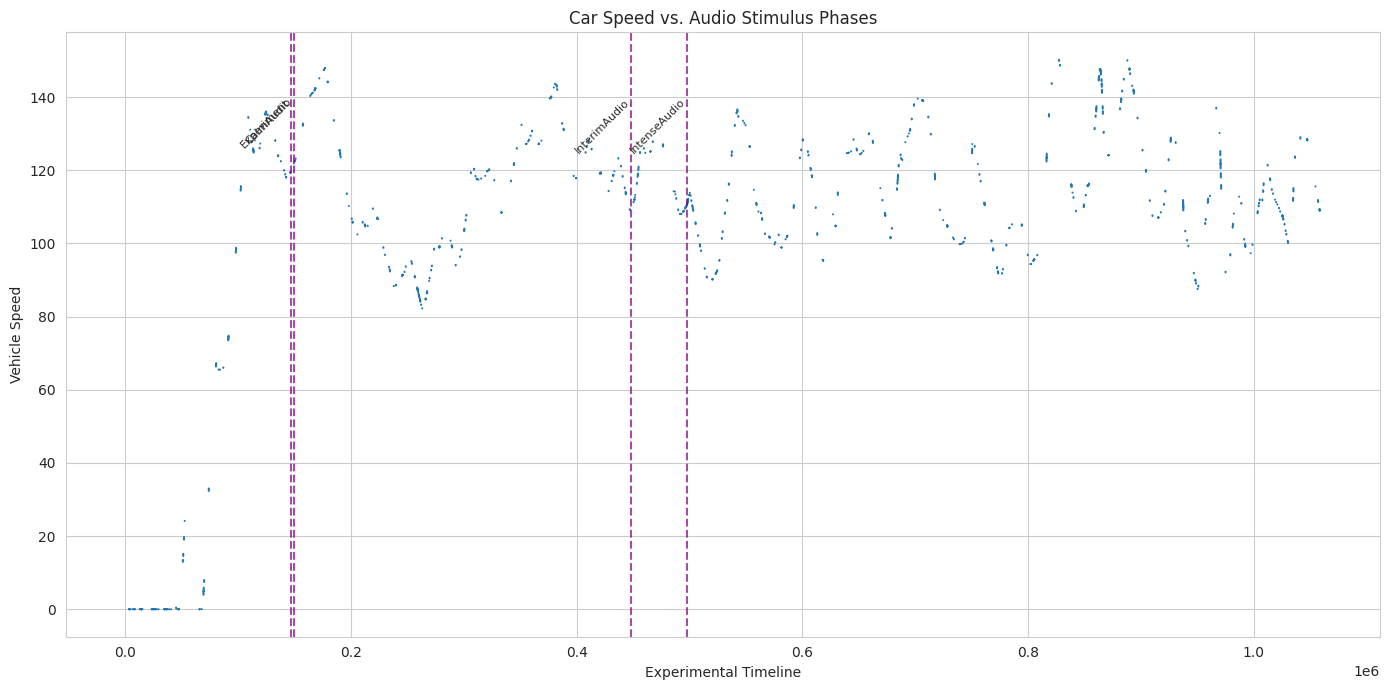

In [33]:
# 2. Create markers DataFrame (ESSENTIAL PRE-STEP)
valid_markers = ['Experiment', 'CalmAudio', 'InterimAudio', 'IntenseAudio']
markers = df[df['MarkerName'].isin(valid_markers)].sort_values('Timestamp').drop_duplicates('MarkerName', keep='first')

# 3. Plotting setup
plt.figure(figsize=(14, 7))
plt.plot(df['Timestamp'], df['CarSpeed'], label='Driving Speed')

# 4. Phase boundaries (NOW markers IS DEFINED)
for _, row in markers.iterrows():
    plt.axvline(row['Timestamp'], color='purple', linestyle='--', alpha=0.7)
    plt.text(row['Timestamp'], 140, row['MarkerName'],
            rotation=45, ha='right', va='top', fontsize=8)



plt.title('Car Speed vs. Audio Stimulus Phases')
plt.xlabel('Experimental Timeline')
plt.ylabel('Vehicle Speed')
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
"""Available Data Channels/Titles:
 1. Row
 2. Timestamp
 3. EventSource
 4. SlideEvent
 5. StimType
 6. Duration
 7. CollectionPhase
 8. SourceStimuliName
 9. EventSource.1
10. SampleNumber
11. Channel 13 (Raw)
12. EventSource.2
13. SampleNumber.1
14. Channel 9 (Raw)
15. EventSource.3
16. MarkerName
17. MarkerDescription
18. MarkerType
19. SceneType
20. EventSource.4
21. DistanceToNextSpeedSign
22. DistanceToNextOverheadSign
23. VelocityX
24. DistanceToTargetPosition
25. DistanceToTargetSpeed
26. CarSpeed
27. EventSource.5
28. CPU Sys
29. Memory Sys
30. CPU Proc
31. Memory Proc
32. EventSource.6
33. ET_GazeLeftx
34. ET_GazeLefty
35. ET_GazeRightx
36. ET_GazeRighty
37. ET_PupilLeft
38. ET_PupilRight
39. ET_TimeSignal
40. ET_DistanceLeft
41. ET_DistanceRight
42. ET_CameraLeftX
43. ET_CameraLeftY
44. ET_CameraRightX
45. ET_CameraRightY
46. EventSource.7
47. Gaze X
48. Gaze Y
49. Interpolated Gaze X
50. Interpolated Gaze Y
51. Interpolated Distance
52. Gaze Velocity
53. Gaze Acceleration
54. Fixation Index
55. Fixation Index by Stimulus
56. Fixation X
57. Fixation Y
58. Fixation Start
59. Fixation End
60. Fixation Duration
61. Fixation Dispersion
62. Saccade Index
63. Saccade Index by Stimulus
64. Saccade Start
65. Saccade End
66. Saccade Duration
67. Saccade Amplitude
68. Saccade Peak Velocity
69. Saccade Peak Acceleration
70. Saccade Peak Deceleration
71. Saccade Direction"""


# Handle missing values using forward-fill interpolation
interpolated_data = df.interpolate('pad')  # Fills NaN with previous valid value

# Filter relevant columns for analysis
trimmed_data = interpolated_data[[
    'Timestamp',
    'Channel 13 (Raw)',  # Likely EDA (Electrodermal Activity)
    'Channel 9 (Raw)',   # Likely ECG (Electrocardiogram)
    'MarkerName',        # Event markers
    'MarkerDescription', # Event details
    'MarkerType',        # Event classification
    'DistanceToNextSpeedSign',  # Driving context
    'DistanceToNextOverheadSign',
    'VelocityX',         # Lateral movement
    'DistanceToTargetPosition',
    'DistanceToTargetSpeed',
    'CarSpeed',          # Current speed
    'ET_PupilLeft',      # Left pupil diameter (key eye-tracking metric)
    'ET_PupilRight',     # Right pupil diameter
    'Fixation Duration',
    'ET_PupilRight',
    'ET_PupilLeft'



]]


<ipython-input-35-b976742dc949>:76: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolated_data = df.interpolate('pad')  # Fills NaN with previous valid value


In [36]:
# List all unique markers
print(trimmed_data['MarkerName'].unique())

[nan 'Experiment' 'CalmAudio' 'InterimAudio' 'IntenseAudio']


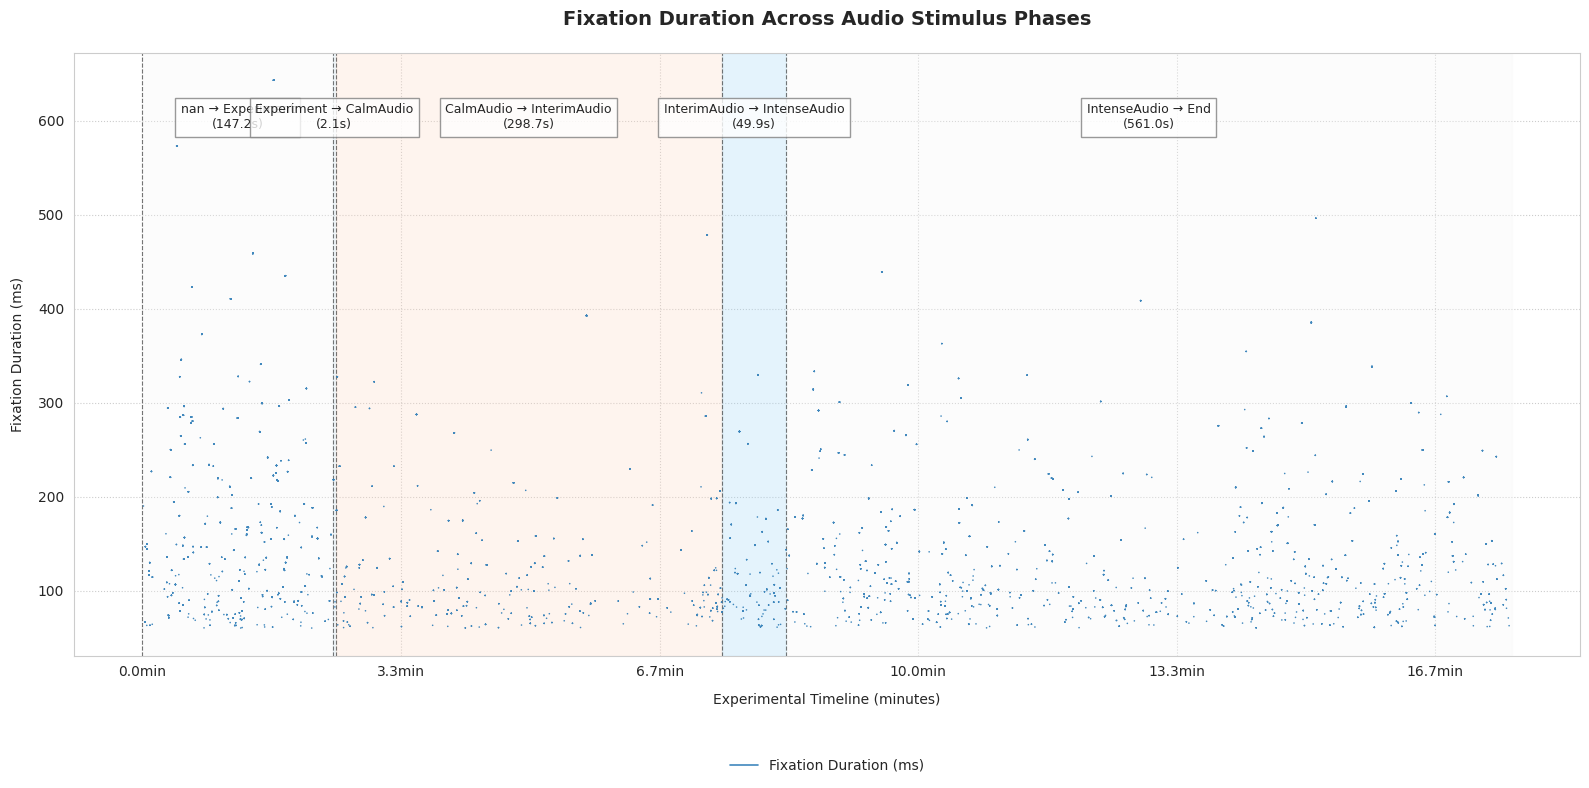

In [38]:
# Enhanced Phase Visualization Setup
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Plot speed data with improved styling
speed_line = ax.plot(df['Timestamp'], df['Fixation Duration'],
                    color='#2c7bb6', linewidth=1.2,
                    label='Fixation Duration (ms)',
                    alpha=0.9, zorder=3)

# Phase Background Coloring
phase_colors = ['#f7f7f7', '#d1e5f0', '#fddbc7', '#a6d8f7']
for idx, phase in phase_df.iterrows():
    ax.axvspan(phase['Start'], phase['End'],
              color=phase_colors[idx%4],
              alpha=0.3, zorder=1)

#  Annotated Phase Boundaries
for _, phase in phase_df.iterrows():
    ax.axvline(phase['Start'], color='#404040',
              linestyle='--', linewidth=0.8,
              alpha=0.7, zorder=2)

    # Center-aligned phase duration labels
    mid_point = phase['Start'] + (phase['Duration']/2)
    ax.text(mid_point, ax.get_ylim()[1]*0.92,
           f"{phase['Phase']}\n({phase['Duration']/1000:.1f}s)",
           ha='center', va='top',
           fontsize=9, backgroundcolor='white',
           bbox=dict(facecolor='white', edgecolor='grey', alpha=0.8))

#  Time Format Conversion
def ms_to_min(ts):
    return f"{ts/60000:.1f}min"

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: ms_to_min(x)))

# 6. Final Styling
ax.set_title('Fixation Duration Across Audio Stimulus Phases',
            pad=20, fontsize=14, weight='semibold')
ax.set_xlabel('Experimental Timeline (minutes)', labelpad=10)
ax.set_ylabel('Fixation Duration (ms)', labelpad=10)
ax.grid(True, which='major', linestyle=':', color='grey', alpha=0.4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
         ncol=2, frameon=False)

plt.tight_layout()
plt.show()


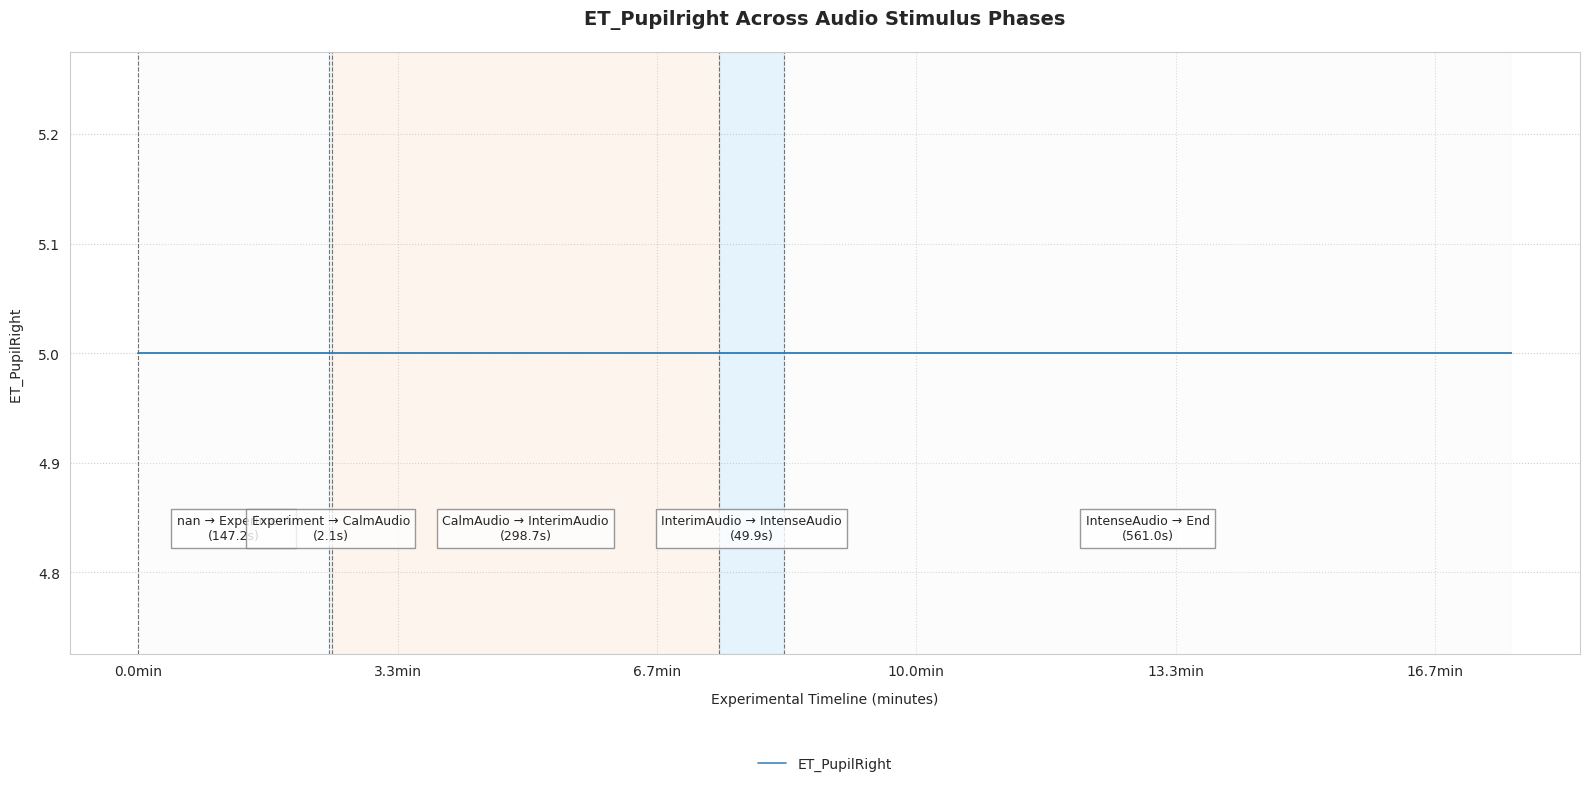

In [39]:
#  Enhanced Phase Visualization Setup
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Plot speed data with improved styling
speed_line = ax.plot(df['Timestamp'], df['ET_PupilRight'],
                    color='#2c7bb6', linewidth=1.2,
                    label='ET_PupilRight',
                    alpha=0.9, zorder=3)

# Phase Background Coloring
phase_colors = ['#f7f7f7', '#d1e5f0', '#fddbc7', '#a6d8f7']
for idx, phase in phase_df.iterrows():
    ax.axvspan(phase['Start'], phase['End'],
              color=phase_colors[idx%4],
              alpha=0.3, zorder=1)

#  Annotated Phase Boundaries
for _, phase in phase_df.iterrows():
    ax.axvline(phase['Start'], color='#404040',
              linestyle='--', linewidth=0.8,
              alpha=0.7, zorder=2)

    # Center-aligned phase duration labels
    mid_point = phase['Start'] + (phase['Duration']/2)
    ax.text(mid_point, ax.get_ylim()[1]*0.92,
           f"{phase['Phase']}\n({phase['Duration']/1000:.1f}s)",
           ha='center', va='top',
           fontsize=9, backgroundcolor='white',
           bbox=dict(facecolor='white', edgecolor='grey', alpha=0.8))

# Time Format Conversion
def ms_to_min(ts):
    return f"{ts/60000:.1f}min"

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: ms_to_min(x)))

# Final Styling
ax.set_title('ET_Pupilright Across Audio Stimulus Phases',
            pad=20, fontsize=14, weight='semibold')
ax.set_xlabel('Experimental Timeline (minutes)', labelpad=10)
ax.set_ylabel('ET_PupilRight ', labelpad=10)
ax.grid(True, which='major', linestyle=':', color='grey', alpha=0.4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
         ncol=2, frameon=False)

plt.tight_layout()
plt.show()


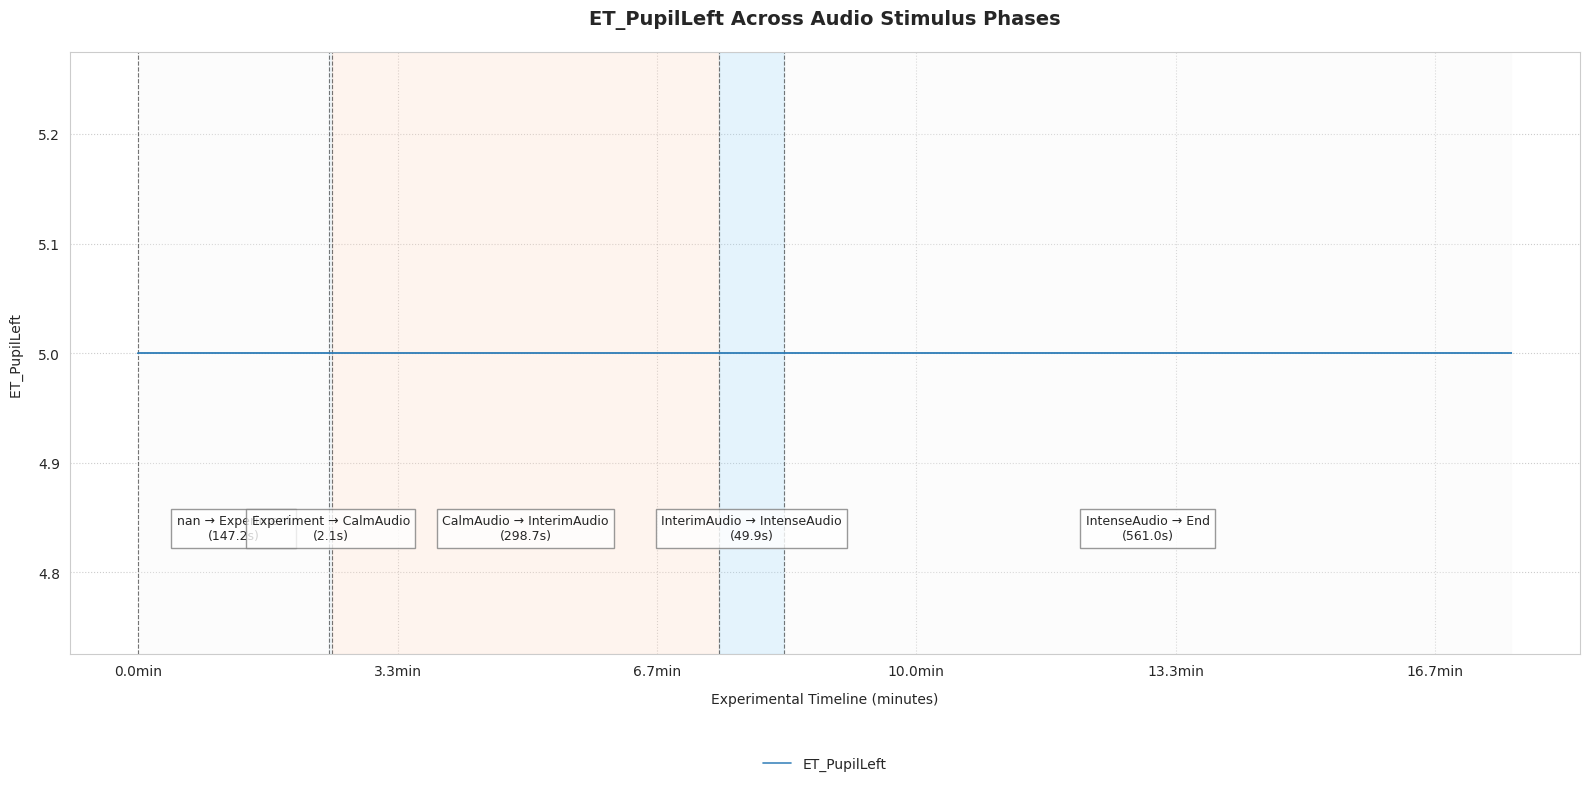

In [40]:
#  Enhanced Phase Visualization Setup
plt.figure(figsize=(16, 8))
ax = plt.gca()

# Plot speed data with improved styling
speed_line = ax.plot(df['Timestamp'], df['ET_PupilLeft'],
                    color='#2c7bb6', linewidth=1.2,
                    label='ET_PupilLeft',
                    alpha=0.9, zorder=3)

#  Phase Background Coloring
phase_colors = ['#f7f7f7', '#d1e5f0', '#fddbc7', '#a6d8f7']
for idx, phase in phase_df.iterrows():
    ax.axvspan(phase['Start'], phase['End'],
              color=phase_colors[idx%4],
              alpha=0.3, zorder=1)

#  Annotated Phase Boundaries
for _, phase in phase_df.iterrows():
    ax.axvline(phase['Start'], color='#404040',
              linestyle='--', linewidth=0.8,
              alpha=0.7, zorder=2)

    # Center-aligned phase duration labels
    mid_point = phase['Start'] + (phase['Duration']/2)
    ax.text(mid_point, ax.get_ylim()[1]*0.92,
           f"{phase['Phase']}\n({phase['Duration']/1000:.1f}s)",
           ha='center', va='top',
           fontsize=9, backgroundcolor='white',
           bbox=dict(facecolor='white', edgecolor='grey', alpha=0.8))

# Time Format Conversion
def ms_to_min(ts):
    return f"{ts/60000:.1f}min"

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: ms_to_min(x)))

#  Final Styling
ax.set_title('ET_PupilLeft Across Audio Stimulus Phases',
            pad=20, fontsize=14, weight='semibold')
ax.set_xlabel('Experimental Timeline (minutes)', labelpad=10)
ax.set_ylabel('ET_PupilLeft ', labelpad=10)
ax.grid(True, which='major', linestyle=':', color='grey', alpha=0.4)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
         ncol=2, frameon=False)

plt.tight_layout()
plt.show()


In [26]:
# Check eye tracker calibration
trimmed_data[['ET_PupilLeft', 'ET_PupilRight']].describe()

,ET_PupilLeft,ET_PupilLeft,ET_PupilRight,ET_PupilRight
count,427448.0,427448.0,427448.0,427448.0
mean,5.0,5.0,5.0,5.0
std,0.0,0.0,0.0,0.0
min,5.0,5.0,5.0,5.0
25%,5.0,5.0,5.0,5.0
50%,5.0,5.0,5.0,5.0
75%,5.0,5.0,5.0,5.0
max,5.0,5.0,5.0,5.0


In [41]:
before_audio_start = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='Experiment') & (trimmed_data['MarkerType']=='S')].iloc[0]
before_audio_end = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='Experiment') & (trimmed_data['MarkerType']=='S')].iloc[-1]

calm_audio_start = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='CalmAudio') & (trimmed_data['MarkerType']=='S')].iloc[0]
calm_audio_end = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='CalmAudio') & (trimmed_data['MarkerType']=='E')].iloc[0]

interim_audio_start = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='InterimAudio') & (trimmed_data['MarkerType']=='S')].iloc[0]
interim_audio_end = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='InterimAudio') & (trimmed_data['MarkerType']=='E')].iloc[0]

intense_audio_start = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='IntenseAudio') & (trimmed_data['MarkerType']=='S')].iloc[0]
intense_audio_end = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='IntenseAudio') & (trimmed_data['MarkerType']=='E')].iloc[0]

after_audio_start = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='IntenseAudio') & (trimmed_data['MarkerType']=='E')].iloc[0]
after_audio_end = trimmed_data[trimmed_data['MarkerName'].notna() & (trimmed_data['MarkerName']=='IntenseAudio') & (trimmed_data['MarkerType']=='E')].iloc[-1]

In [42]:
before_range = np.arange(before_audio_start['Timestamp'], before_audio_end['Timestamp'])
calm_range = np.arange(calm_audio_start['Timestamp'], calm_audio_end['Timestamp'])
interim_range = np.arange(interim_audio_start['Timestamp'],interim_audio_end['Timestamp'])
intense_range = np.arange(intense_audio_start['Timestamp'], intense_audio_end['Timestamp'])
after_range = np.arange(after_audio_start['Timestamp'], after_audio_end['Timestamp'])
total_range = np.arange(before_audio_start['Timestamp'],after_audio_end['Timestamp'])
  # before_audio.iloc[0]['Timestamp'],calm_audio.iloc[0]['Timestamp'],interim_audio.iloc[0]['Timestamp'], intense_audio.iloc[0]['Timestamp'],after_audio.iloc[0]['Timestamp'] ]

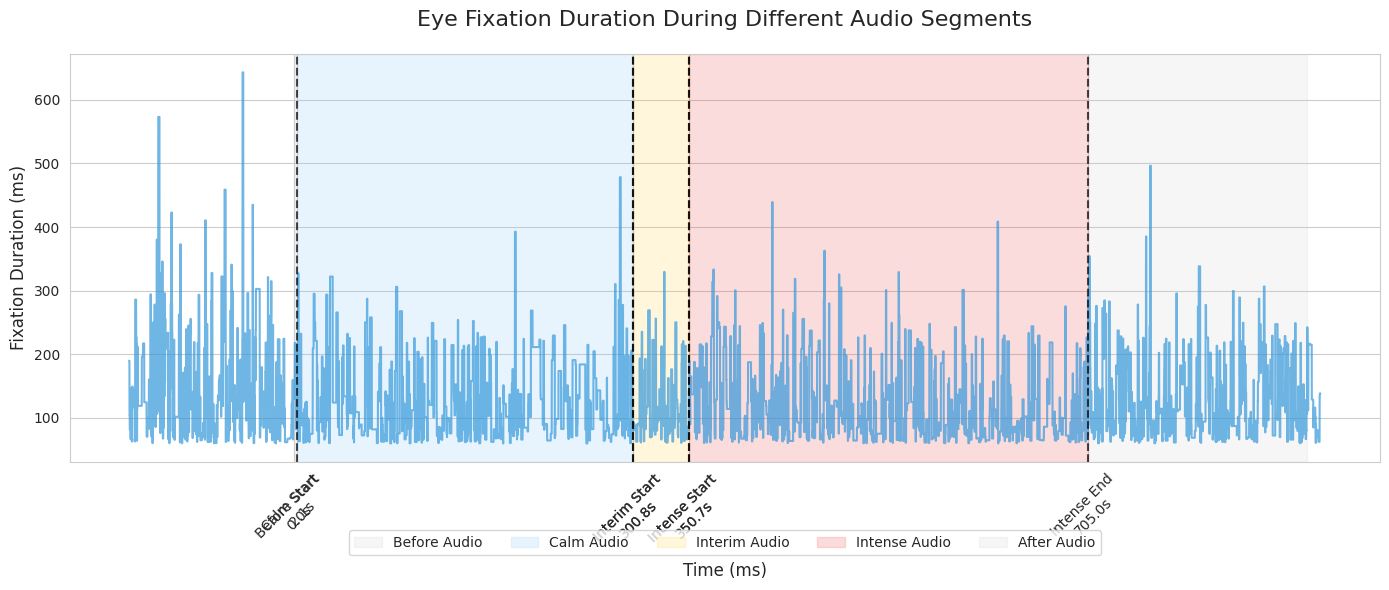

In [43]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Plot the fixation duration over time
plt.plot(trimmed_data['Timestamp'], trimmed_data['Fixation Duration'],
         color='#3498db', linewidth=1.5, alpha=0.7)

# Define color scheme for different audio segments
colors = {
    'Before': '#D3D3D3',  # Light gray
    'Calm': '#90CAF9',    # Light blue
    'Interim': '#FFD54F', # Light amber
    'Intense': '#EF5350', # Light red
    'After': '#D3D3D3'    # Light gray
}

# Add colored background regions for each audio segment
y_min, y_max = plt.ylim()
plt.axvspan(before_audio_start['Timestamp'], calm_audio_start['Timestamp'],
            alpha=0.2, color=colors['Before'], label='Before Audio')
plt.axvspan(calm_audio_start['Timestamp'], calm_audio_end['Timestamp'],
            alpha=0.2, color=colors['Calm'], label='Calm Audio')
plt.axvspan(interim_audio_start['Timestamp'], interim_audio_end['Timestamp'],
            alpha=0.2, color=colors['Interim'], label='Interim Audio')
plt.axvspan(intense_audio_start['Timestamp'], intense_audio_end['Timestamp'],
            alpha=0.2, color=colors['Intense'], label='Intense Audio')
plt.axvspan(intense_audio_end['Timestamp'], after_audio_end['Timestamp'],
            alpha=0.2, color=colors['After'], label='After Audio')

# Add vertical lines at transition points
plt.axvline(x=calm_audio_start['Timestamp'], color='black', linestyle='--', alpha=0.7)
plt.axvline(x=calm_audio_end['Timestamp'], color='black', linestyle='--', alpha=0.7)
plt.axvline(x=interim_audio_start['Timestamp'], color='black', linestyle='--', alpha=0.7)
plt.axvline(x=interim_audio_end['Timestamp'], color='black', linestyle='--', alpha=0.7)
plt.axvline(x=intense_audio_start['Timestamp'], color='black', linestyle='--', alpha=0.7)
plt.axvline(x=intense_audio_end['Timestamp'], color='black', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title('Eye Fixation Duration During Different Audio Segments', fontsize=16, pad=20)
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Fixation Duration (ms)', fontsize=12)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Improve x-axis readability by converting to relative time
relative_timestamps = []
for phase, time in [
    ('Before Start', before_audio_start['Timestamp']),
    ('Calm Start', calm_audio_start['Timestamp']),
    ('Calm End', calm_audio_end['Timestamp']),
    ('Interim Start', interim_audio_start['Timestamp']),
    ('Interim End', interim_audio_end['Timestamp']),
    ('Intense Start', intense_audio_start['Timestamp']),
    ('Intense End', intense_audio_end['Timestamp'])
]:
    relative_time = (time - before_audio_start['Timestamp']) / 1000  # Convert to seconds
    relative_timestamps.append((phase, time, relative_time))

# Set custom x-ticks at the phase transitions
plt.xticks([t[1] for t in relative_timestamps],
           [f"{t[0]}\n{t[2]:.1f}s" for t in relative_timestamps],
           rotation=45)

plt.tight_layout()
plt.show()
